In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Load the dataset
df = pd.read_csv("Olympic_Swimming.csv")



In [3]:




# Assuming df is your DataFrame
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

# Check for outliers (assuming 'column_name' is the column you want to check for outliers)
# Convert column to numeric if it's not already numeric
df['Results'] = pd.to_numeric(df['Results'], errors='coerce')

# Calculate IQR and identify outliers
column = df['Results']
Q1 = column.quantile(0.25)
Q3 = column.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(pd.to_numeric(df['Results'], errors='coerce') < lower_bound) | (pd.to_numeric(df['Results'], errors='coerce') > upper_bound)]
print("\nOutliers:\n", outliers)




Missing Values:
 Location                 0
Year                     0
Distance (in meters)     0
Stroke                   0
Relay?                   0
Gender                   0
Team                     0
Athlete                 14
Results                 28
Rank                     0
dtype: int64

Duplicate Rows:
      Location  Year Distance (in meters)        Stroke  Relay? Gender Team  \
200     Tokyo  2020                 400m     Freestyle       0  Women  AUS   
201     Tokyo  2020                 400m     Freestyle       0  Women  USA   
202     Tokyo  2020                 400m     Freestyle       0  Women  CHN   
203     Tokyo  2020                 400m     Freestyle       0  Women  CAN   
204     Tokyo  2020                 400m     Freestyle       0  Women  CHN   
205     Tokyo  2020                 400m     Freestyle       0  Women  GER   
206     Tokyo  2020                 400m     Freestyle       0  Women  USA   
207     Tokyo  2020                 400m     Freestyle    

In [4]:

#accu
summary = df.describe()
data_types = df.dtypes
unique_values = df.nunique()
missing_values = df.isnull().sum()

print("Data Summary:\n", summary)
print("\nData Types:\n", data_types)
print("\nUnique Values:\n", unique_values)
print("\nMissing Values:\n", missing_values)

# Data validation
# Example: Check if any column has negative values
numeric_columns = df.select_dtypes(include=['number']).columns
negative_values = (df[numeric_columns] < 0).any()
print("\nColumns with Negative Values:\n", negative_values)


Data Summary:
               Year       Relay?     Results         Rank
count  4359.000000  4359.000000  750.000000  4359.000000
mean   1982.936453     0.169764   48.709227     3.164946
std      26.928344     0.375468   12.709812     1.189715
min    1912.000000     0.000000   21.070000     0.000000
25%    1968.000000     0.000000   48.997500     2.000000
50%    1988.000000     0.000000   53.690000     4.000000
75%    2004.000000     0.000000   57.035000     4.000000
max    2020.000000     1.000000   59.970000     5.000000

Data Types:
 Location                 object
Year                      int64
Distance (in meters)     object
Stroke                   object
Relay?                    int64
Gender                   object
Team                     object
Athlete                  object
Results                 float64
Rank                      int64
dtype: object

Unique Values:
 Location                  22
Year                      25
Distance (in meters)       8
Stroke              

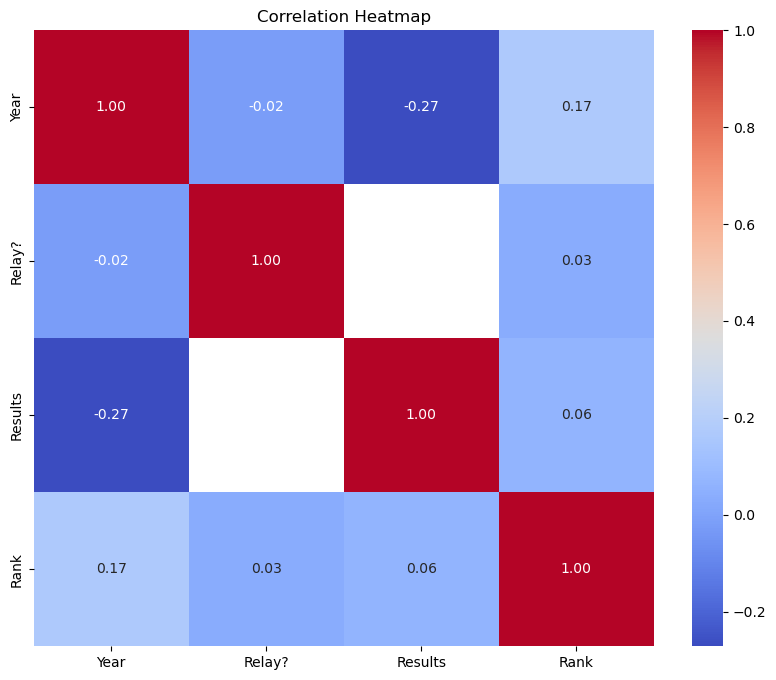

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

d:\aaaaaaaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


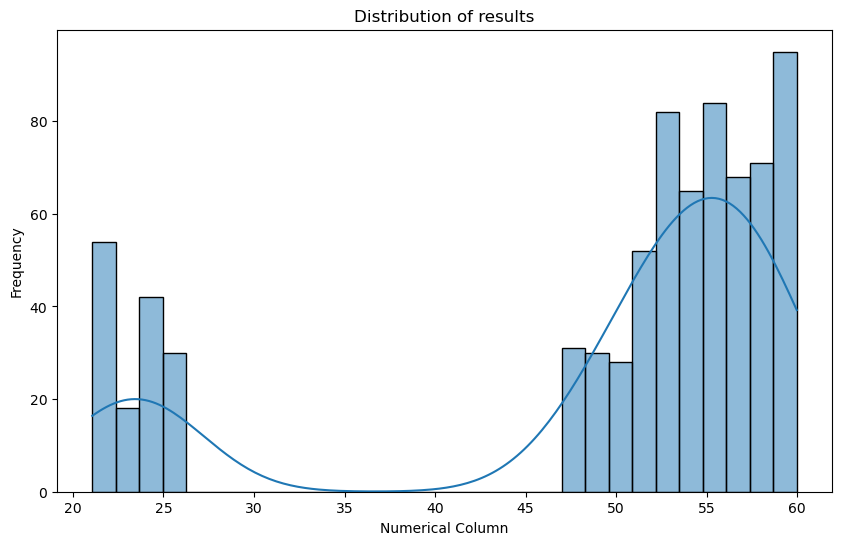

d:\aaaaaaaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\aaaaaaaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\aaaaaaaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\aaaaaaaaaaaaaa\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_c

<Figure size 1000x600 with 0 Axes>

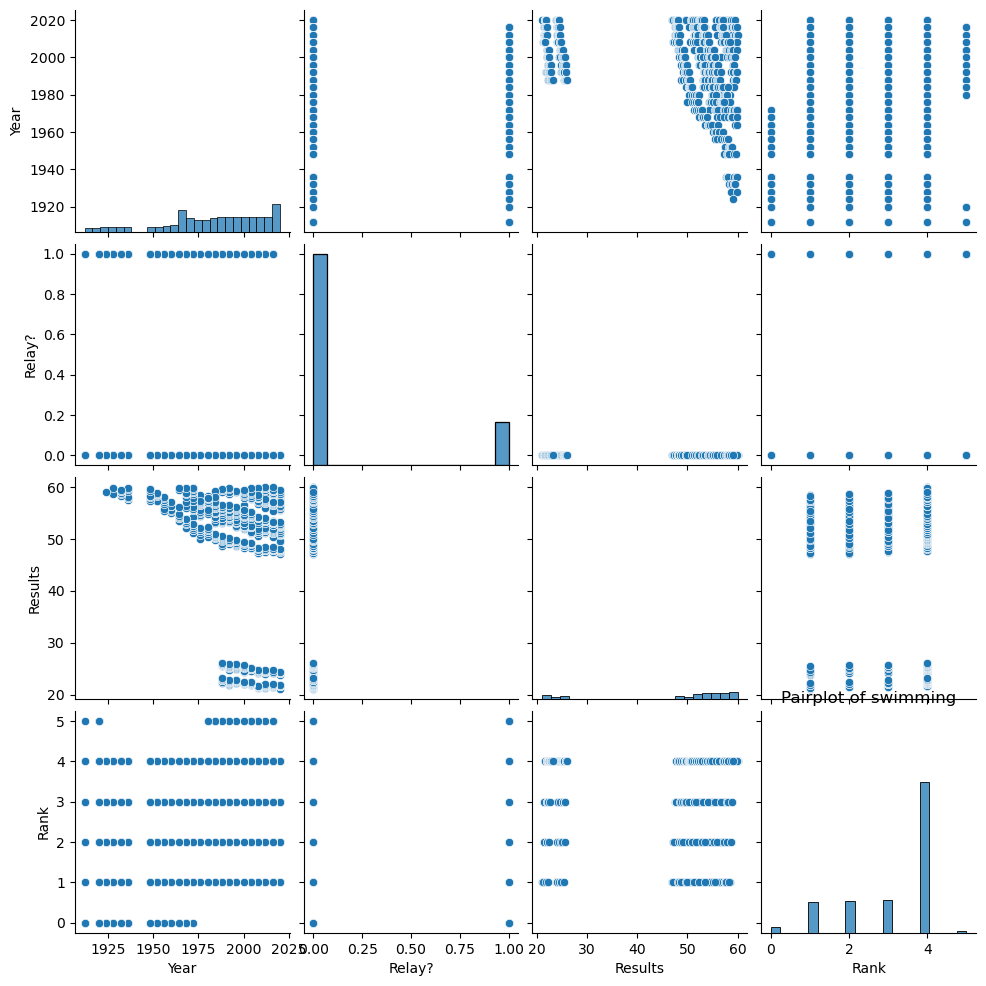

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Results', bins=30, kde=True)
plt.title('Distribution of results')
plt.xlabel('Numerical Column')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.title('Pairplot of swimming')
plt.show()

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Assuming df is your DataFrame with the following columns:
# Distance, Stroke, Gender, Results, Rank

# Drop any rows with missing values
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
df['Stroke'] = le.fit_transform(df['Stroke'])
df['Gender'] = le.fit_transform(df['Gender'])

# Convert 'Distance' column to numeric
df['Distance (in meters)'] = df['Distance (in meters)'].str.replace('m', '').astype(int)

# Split the data into features and target variable
X = df[['Distance (in meters)', 'Stroke', 'Gender', 'Rank']]
y = df['Results']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 5.574555710940951
Mean Absolute Error: 1.698349857016768


In [26]:
pip install Flask


In [8]:

import pandas as pd



# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicates
duplicate_rows = df[df.duplicated()]
print("\nDuplicate Rows:\n", duplicate_rows)

# Remove duplicate rows if any
df = df.drop_duplicates()

# Convert 'Results' column to numeric if it's not already numeric
df['Results'] = pd.to_numeric(df['Results'], errors='coerce')

# Calculate IQR and identify outliers
Q1 = df['Results'].quantile(0.25)
Q3 = df['Results'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Results'] < lower_bound) | (df['Results'] > upper_bound)]
print("\nOutliers:\n", outliers)

# Display a summary of the dataset
summary = df.describe()
data_types = df.dtypes
unique_values = df.nunique()
missing_values = df.isnull().sum()

print("\nData Summary:\n", summary)
print("\nData Types:\n", data_types)
print("\nUnique Values:\n", unique_values)
print("\nMissing Values:\n", missing_values)

# Data validation
# Check if any column has negative values
numeric_columns = df.select_dtypes(include=['number']).columns
negative_values = (df[numeric_columns] < 0).any()
print("\nColumns with Negative Values:\n", negative_values)

# Additional validation checks

# Validate 'Year' column to be within a specific range (assuming Olympic years)
valid_years = [2020]
invalid_years = df[~df['Year'].isin(valid_years)]
print("\nInvalid Years:\n", invalid_years)

# Validate 'Distance (in meters)' to be one of the expected values (assuming only certain distances are valid)
valid_distances = [100, 1500, 200]
invalid_distances = df[~df['Distance (in meters)'].isin(valid_distances)]
print("\nInvalid Distances:\n", invalid_distances)

# Validate 'Stroke' to be one of the expected values
valid_strokes = ['Backstroke', 'Breaststroke', 'Butterfly', 'Freestyle', 'Individual medley']
invalid_strokes = df[~df['Stroke'].isin(valid_strokes)]
print("\nInvalid Strokes:\n", invalid_strokes)

# Validate 'Gender' to be either 'Men' or 'Women'
valid_genders = ['Men', 'Women']
invalid_genders = df[~df['Gender'].isin(valid_genders)]
print("\nInvalid Genders:\n", invalid_genders)

# Validate 'Rank' to be within the valid range (assuming ranks from 1 to the maximum in the dataset)
max_rank = df['Rank'].max()
invalid_ranks = df[~df['Rank'].between(1, max_rank)]
print("\nInvalid Ranks:\n", invalid_ranks)

# Summary of findings
print("\nSummary of Findings:")
print(f"Total missing values: {missing_values.sum()}")
print(f"Total duplicate rows removed: {len(duplicate_rows)}")
print(f"Total outliers detected: {len(outliers)}")
print(f"Total invalid years: {len(invalid_years)}")
print(f"Total invalid distances: {len(invalid_distances)}")
print(f"Total invalid strokes: {len(invalid_strokes)}")
print(f"Total invalid genders: {len(invalid_genders)}")
print(f"Total invalid ranks: {len(invalid_ranks)}")


Missing Values:
 Location                0
Year                    0
Distance (in meters)    0
Stroke                  0
Relay?                  0
Gender                  0
Team                    0
Athlete                 0
Results                 0
Rank                    0
dtype: int64

Duplicate Rows:
 Empty DataFrame
Columns: [Location, Year, Distance (in meters), Stroke, Relay?, Gender, Team, Athlete, Results, Rank]
Index: []

Outliers:
      Location  Year  Distance (in meters)  Stroke  Relay?  Gender Team  \
96      Tokyo  2020                    50       3       0       0  USA   
97      Tokyo  2020                    50       3       0       0  FRA   
98      Tokyo  2020                    50       3       0       0  BRA   
99      Tokyo  2020                    50       3       0       0  USA   
100     Tokyo  2020                    50       3       0       0  GBR   
...       ...   ...                   ...     ...     ...     ...  ...   
2243    Seoul  1988               

In [9]:
# Convert 'Results' column to numeric data type
df['Results'] = pd.to_numeric(df['Results'], errors='coerce')

# Check if conversion was successful
print(df['Results'].dtype)  # Should print 'float64' if successful

# Now, you can proceed with creating new features
# 1. Previous Performance
df['avg_previous_performance'] = df.groupby('Athlete')['Results'].transform('mean')

# 2. Seasonal Performance
df['seasonal_performance_trend'] = df.groupby(['Athlete', 'Year'])['Results'].transform('mean')

# Display the updated DataFrame
print(df.head())


float64
  Location  Year  Distance (in meters)  Stroke  Relay?  Gender Team  \
0    Tokyo  2020                   100       0       0       0  ROC   
1    Tokyo  2020                   100       0       0       0  ROC   
2    Tokyo  2020                   100       0       0       0  USA   
3    Tokyo  2020                   100       0       0       0  ITA   
4    Tokyo  2020                   100       0       0       0  CHN   

              Athlete  Results  Rank  avg_previous_performance  \
0        Evgeny Rylov    51.98     1                     52.36   
1  Kliment Kolesnikov    52.00     2                     49.72   
2         Ryan Murphy    52.19     3                     52.08   
3       Thomas Ceccon    52.30     4                     52.30   
4            Jiayu Xu    52.51     4                     52.41   

   seasonal_performance_trend  
0                       51.98  
1                       49.72  
2                       52.19  
3                       52.30  
4       

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming df is already loaded

# Check and clean data
df = df.dropna()

# Ensure 'Distance (in meters)' is a string, then remove 'm' and convert to integer
df['Distance (in meters)'] = df['Distance (in meters)'].astype(str).str.replace('m', '').astype(int)

# Separate features and target
X = df[['Stroke', 'Distance (in meters)', 'Gender', 'Year']]
y = df['Results']

# Encode categorical variables and scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Distance (in meters)', 'Year']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Stroke', 'Gender'])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the regression model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Example of making a new prediction
new_data = pd.DataFrame({
    'Stroke': ['Freestyle'],
    'Distance (in meters)': [100],
    'Gender': ['Men'],
    'Year': [2024]
})

# Use the same pipeline to transform and predict
new_pred = model.predict(new_data)
print(f"Predicted time for the new data: {new_pred[0]} seconds")






Mean Absolute Error (MAE): 0.4805908479041084
Mean Squared Error (MSE): 0.3759350255332017
Root Mean Squared Error (RMSE): 0.6131354055453018
R² Score: 0.9977380658204774
Predicted time for the new data: 53.712897254689786 seconds


In [18]:
# Define hyperparameters grid for Logistic Regression
log_reg_param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

# Perform GridSearchCV
log_reg_grid_search = GridSearchCV(log_reg_model, log_reg_param_grid, cv=5, scoring='accuracy', verbose=1)
log_reg_grid_search.fit(X_train, y_train_class)  # y_train_class is used for classification

# Get the best hyperparameters and model
log_reg_best_params = log_reg_grid_search.best_params_
log_reg_best_model = log_reg_grid_search.best_estimator_

# Make predictions using the best model
log_reg_y_pred_best = log_reg_best_model.predict(X_test)

# Evaluate the performance of the best model
log_reg_accuracy_best = accuracy_score(y_test_class, log_reg_y_pred_best)
print("Best Logistic Regression Performance (after fine-tuning):")
print(f"Accuracy: {log_reg_accuracy_best}")
print("Best Parameters:", log_reg_best_params)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


d:\aaaaaaaaaaaaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aaaaaaaaaaaaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aaaaaaaaaaaaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aaaaaaaaaaaaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\aaaaaaaaaaaaaa\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Logistic Regression Performance (after fine-tuning):
Accuracy: 0.9
Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}


In [21]:
#Deployment
import joblib
file='Swim'
joblib.dump(rf_model,"Swim")
model=joblib.load(open("Swim",'rb'))


In [17]:
import pandas as pd
import numpy as np


# Feature 1: Athlete Experience
# Assuming you have a dataset with athlete profiles containing their start year
# For demonstration purposes, let's generate random start years for each athlete
unique_athletes = df['Athlete'].unique()
num_athletes = len(unique_athletes)
random_start_years = np.random.randint(2000, 2020, size=num_athletes)

athlete_profiles = pd.DataFrame({
    'Athlete': unique_athletes,
    'Start_Year': random_start_years
})

# Merge athlete experience with the original dataframe
df = pd.merge(df, athlete_profiles, on='Athlete', how='left')
df['Athlete_Experience'] = df['Year'] - df['Start_Year']

# Feature 2: Country Performance
# Example: Total medals won by each country in previous Olympics
country_performance = {
    'USA': 1138,
    'AUS': 468,
    # Add more countries and their performance data
}

# Map country performance to the dataframe
df['Country_Total_Medals'] = df['Team'].map(lambda x: country_performance.get(x, 0))

# Print the first 5 rows of the dataframe
print(df.head())

# If you want to print specific columns, you can do so like this:
print(df[['Athlete', 'Athlete_Experience', 'Country_Total_Medals']].head())

# Now, you have a dataframe 'df' with the original features and the newly created features.
# You can use this dataframe to train your predictive model or further analyze the data.





  Location  Year Distance (in meters)      Stroke  Relay? Gender Team  \
0    Tokyo  2020                 100m  Backstroke       0    Men  ROC   
1    Tokyo  2020                 100m  Backstroke       0    Men  ROC   
2    Tokyo  2020                 100m  Backstroke       0    Men  USA   
3    Tokyo  2020                 100m  Backstroke       0    Men  ITA   
4    Tokyo  2020                 100m  Backstroke       0    Men  CHN   

              Athlete Results  Rank  Start_Year  Athlete_Experience  \
0        Evgeny Rylov   51.98     1        2019                   1   
1  Kliment Kolesnikov      52     2        2017                   3   
2         Ryan Murphy   52.19     3        2001                  19   
3       Thomas Ceccon    52.3     4        2000                  20   
4            Jiayu Xu   52.51     4        2010                  10   

   Country_Total_Medals  
0                     0  
1                     0  
2                  1138  
3                     0  
4   